# Convolutional Neural Network

## Unzip Data

In [ ]:
!unzip cat_breed_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/Russian Blue/45997504_1287.jpg  
  inflating: training_set/Russian Blue/45997555_1311.jpg  
  inflating: training_set/Russian Blue/45997654_1307.jpg  
  inflating: training_set/Russian Blue/45997673_1306.jpg  
  inflating: training_set/Russian Blue/45997809_1299.jpg  
  inflating: training_set/Russian Blue/45997912_1301.jpg  
  inflating: training_set/Russian Blue/45997988_1298.jpg  
  inflating: training_set/Russian Blue/45997996_1292.jpg  
  inflating: training_set/Russian Blue/45998175_1288.jpg  
  inflating: training_set/Russian Blue/45998357_1284.jpg  
  inflating: training_set/Russian Blue/45998434_1281.jpg  
  inflating: training_set/Russian Blue/45998751_1290.jpg  
  inflating: training_set/Russian Blue/45998851_1285.jpg  
  inflating: training_set/Russian Blue/45998862_1283.jpg  
  inflating: training_set/Russian Blue/45998873_1282.jpg  
  inflating: training_set/Russian Blue/45998974_1297.jpg  
  inf

## Importing Necessary Libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Ensure Tensorflow is installed

In [ ]:
print(tf.__version__)

2.7.0


## Data Preprocessing

In [ ]:
# to avoid overfitting, perform image augmentation:

# training set
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        'training_set/',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 14838 images belonging to 7 classes.


In [ ]:
# test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'test_set/',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 3669 images belonging to 7 classes.


In [ ]:
print(training_set.class_indices)

{'Bengal': 0, 'Calico': 1, 'Domestic': 2, 'Persian': 3, 'Russian Blue': 4, 'Siamese': 5, 'Tuxedo': 6}


## Building CNN

In [ ]:
# Initialize a sequential model
cnn = tf.keras.models.Sequential()

#### Archetype: Simple CNN

In [ ]:
# First convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
# Pool the CNN
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Second Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
# Pool the CNN
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Third Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
# Pool the CNN
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Fourth Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
# Pool the CNN
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Regularizing to reduce overfitting
cnn.add(tf.keras.layers.Dense(64, kernel_regularizer='l2'))
# Flattening Layer
cnn.add(tf.keras.layers.Flatten())
# Full Connection Layers
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
# Dropout b/w layers to reduce overfitting
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
# Output Layer
cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))  # multiunit classification

## Training CNN

In [ ]:
# Compile CNN
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train w/ Training Set, Evaluate W/ Test Set
history = cnn.fit(x=training_set, validation_data=test_set, epochs=30)

Epoch 1/30
464/464 [==============================] - 124s 264ms/step - loss: 1.9324 - accuracy: 0.2393 - val_loss: 1.6337 - val_accuracy: 0.3415
Epoch 2/30
464/464 [==============================] - 120s 258ms/step - loss: 1.6634 - accuracy: 0.3331 - val_loss: 1.6002 - val_accuracy: 0.3660
Epoch 3/30
464/464 [==============================] - 120s 259ms/step - loss: 1.6085 - accuracy: 0.3668 - val_loss: 1.5208 - val_accuracy: 0.4211
Epoch 4/30
464/464 [==============================] - 120s 259ms/step - loss: 1.5669 - accuracy: 0.3922 - val_loss: 1.4991 - val_accuracy: 0.4535
Epoch 5/30
464/464 [==============================] - 120s 259ms/step - loss: 1.4993 - accuracy: 0.4307 - val_loss: 1.3724 - val_accuracy: 0.4813
Epoch 6/30
464/464 [==============================] - 120s 258ms/step - loss: 1.4536 - accuracy: 0.4556 - val_loss: 1.3786 - val_accuracy: 0.4873
Epoch 7/30
464/464 [==============================] - 119s 257ms/step - loss: 1.4145 - accuracy: 0.4670 - val_loss: 1.3549 -

# Plotting Accuracy & Loss

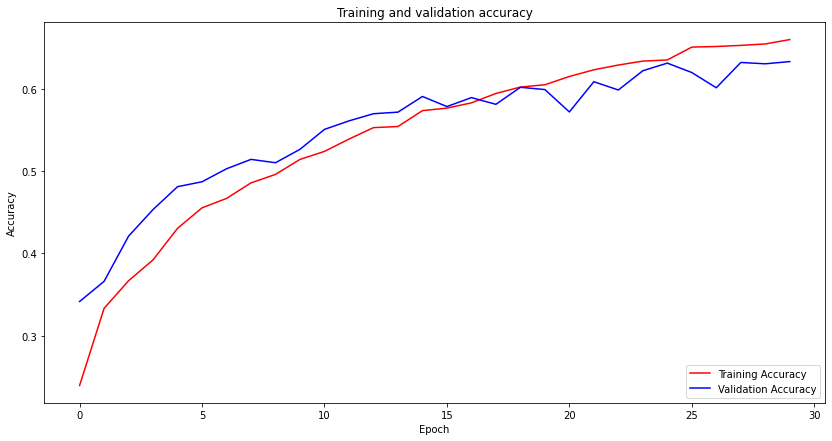

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

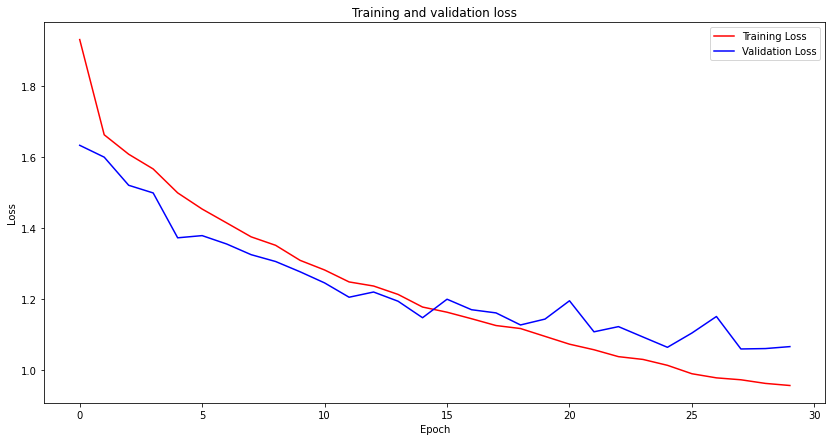

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
cnn.save("cat_breed_classifier_7Classes_63-acc.h5")

In [ ]:
from google.colab import files
files.download('cat_breed_classifier_7Classes_63-acc.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Making a Prediction

In [ ]:
import numpy as np
from keras.preprocessing.image import image
test_image = image.load_img('single_prediction/siamese.jpg', target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0) # expand to batch
result = cnn.predict(test_image/255.0)
labels = np.argmax(result, axis=-1)    
# print(labels)
# print(result[0])
print(list(training_set.class_indices)[int(labels)])


Siamese


In [ ]:
print(prediction)

In [ ]:
model = tf.keras.models.load_model('cat_breed_classifier_7Classes_63-acc.h5')

In [ ]:
import numpy as np
from keras.preprocessing.image import image
test_image = image.load_img('single_prediction/persian.jpg', target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0) # expand to batch
result = model.predict(test_image/255.0)
labels = np.argmax(result, axis=-1)    
print(training_set.class_indices)
print(labels)
print(result[0])
print(list(training_set.class_indices)[int(labels)])
